In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad = pd.read_csv("Advertisement.csv")

In [3]:
ad.head()

,TV,Radio,Newspaper,Sales,Size,Area
0,230.1,37.8,69.2,22.1,large,rural
1,44.5,39.3,45.1,10.4,small,urban
2,17.2,45.9,69.3,12.0,large,suburban
3,151.5,41.3,58.5,16.5,small,rural
4,180.8,10.8,58.4,17.9,large,urban


In [4]:
ad.tail()

,TV,Radio,Newspaper,Sales,Size,Area
195,38.2,3.7,13.8,7.6,large,urban
196,94.2,4.9,8.1,14.0,small,suburban
197,177.0,9.3,6.4,14.8,large,rural
198,283.6,42.0,66.2,25.5,large,suburban
199,232.1,8.6,8.7,18.4,small,suburban


In [5]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   Size       200 non-null    object 
 5   Area       200 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [7]:
#Variable identification
#Independent Variables = [TV,Radio, Newspaper]
#Dependent Variable = Sales

In [8]:
#Variable Analysis

In [9]:
ad.count()

TV           200
Radio        200
Newspaper    200
Sales        200
Size         200
Area         200
dtype: int64

In [10]:
ad.isnull()

,TV,Radio,Newspaper,Sales,Size,Area
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [11]:
ad.isnull().values.any()

False

In [12]:
#Univariate Analysis

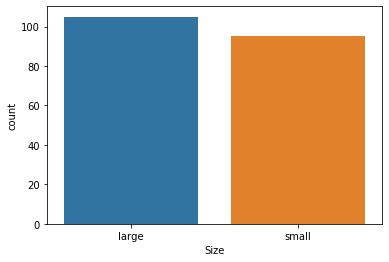

In [13]:
sns.countplot(x='Size', data = ad)

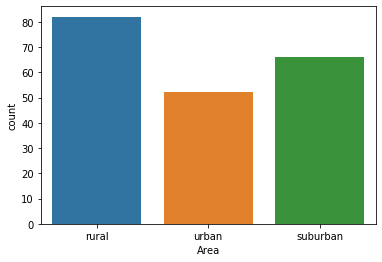

In [14]:
sns.countplot(x='Area', data = ad)

In [15]:
#Bivariate Analysis

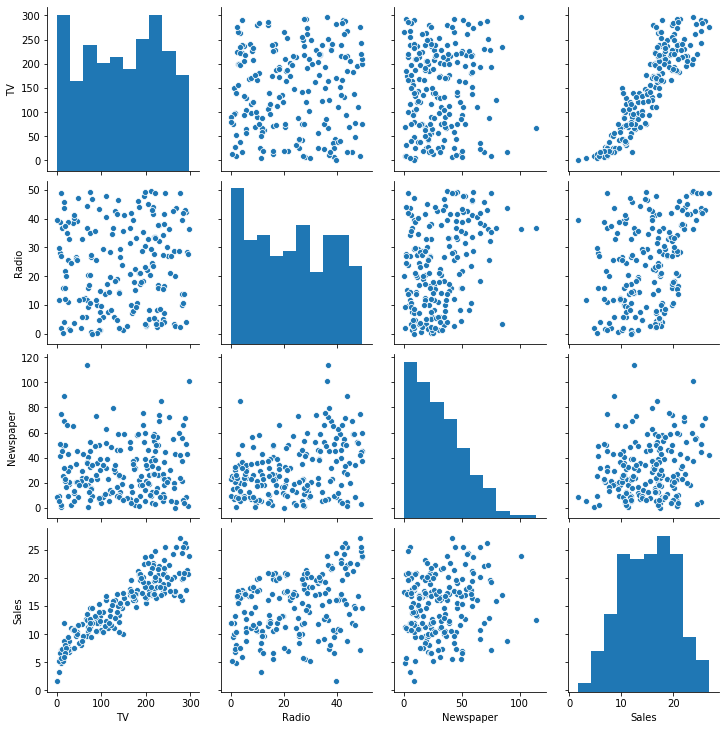

In [16]:
sns.pairplot(ad)

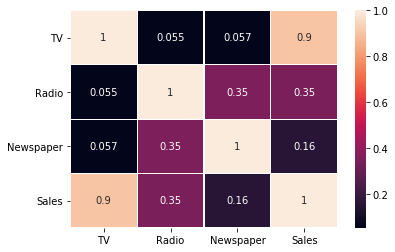

In [17]:
sns.heatmap(ad.corr(), linewidth =0.05, annot = True)

In [18]:
#Insights can be drawn that-
#Sales and Newpaper has the strongest relationship, followed by Radio and Sales, weakest is between newspaper and sales.

In [19]:
#Identifying Outliers

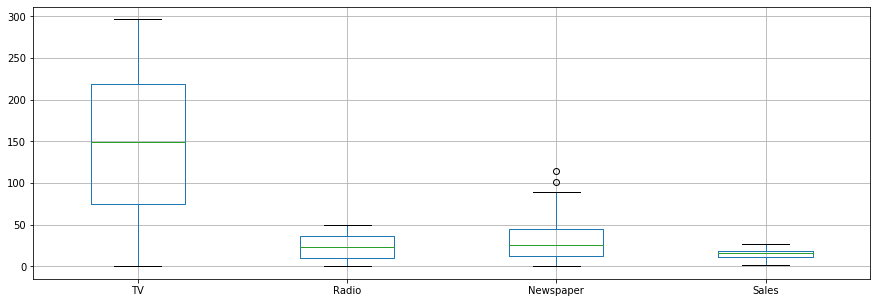

In [20]:
plt.figure(figsize = (15,5))
ad.boxplot()

In [21]:
#Removing Outliner in newspaper

In [22]:
iqr = ad['Newspaper'].quantile(0.75)-ad['Newspaper'].quantile(0.25)
iqr


32.35

In [23]:
#Upper limit
up_lt = ad['Newspaper'].quantile(0.75) + 1.5*iqr
up_lt

93.625

In [24]:
ad[ad['Newspaper']>up_lt]

,TV,Radio,Newspaper,Sales,Size,Area
16,67.8,36.6,114.0,12.5,large,rural
101,296.4,36.3,100.9,23.8,large,urban


In [25]:
ad['Newspaper'][16]=ad['Newspaper'].quantile(0.95)
ad['Newspaper'][101]=ad['Newspaper'].quantile(0.95)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


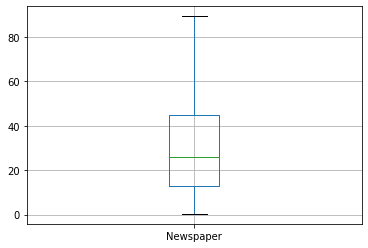

In [26]:
ad.boxplot('Newspaper')

In [27]:
#Creating Dummy Variables

In [28]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
 4   Size       200 non-null    object 
 5   Area       200 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [29]:
ad = pd.get_dummies(ad, drop_first = True)
ad.head()

,TV,Radio,Newspaper,Sales,Size_small,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,0,0,0
1,44.5,39.3,45.1,10.4,1,0,1
2,17.2,45.9,69.3,12.0,0,1,0
3,151.5,41.3,58.5,16.5,1,0,0
4,180.8,10.8,58.4,17.9,0,0,1


In [30]:
#Defining X and Y

In [31]:
cols = ad.columns

In [32]:
cols = ['TV','Radio','Newspaper','Size_small','Area_suburban','Area_urban','Sales']

In [33]:
ad = ad[cols]
ad.head()

,TV,Radio,Newspaper,Size_small,Area_suburban,Area_urban,Sales
0,230.1,37.8,69.2,0,0,0,22.1
1,44.5,39.3,45.1,1,0,1,10.4
2,17.2,45.9,69.3,0,1,0,12.0
3,151.5,41.3,58.5,1,0,0,16.5
4,180.8,10.8,58.4,0,0,1,17.9


In [34]:
x = ad.iloc[:,0:-1].values
y = ad.iloc[:,-1].values

In [35]:
x

array([[230.1,  37.8,  69.2,   0. ,   0. ,   0. ],
       [ 44.5,  39.3,  45.1,   1. ,   0. ,   1. ],
       [ 17.2,  45.9,  69.3,   0. ,   1. ,   0. ],
       ...,
       [177. ,   9.3,   6.4,   0. ,   0. ,   0. ],
       [283.6,  42. ,  66.2,   0. ,   1. ,   0. ],
       [232.1,   8.6,   8.7,   1. ,   1. ,   0. ]])

In [36]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [37]:
#Splitting into X and Y

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.30, random_state = 35)

In [39]:
#Performing Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
mlr = LinearRegression()

In [42]:
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#intercept
print(mlr.intercept_)

4.841870050344442


In [44]:
#coefficients
print(mlr.coef_)

[ 0.05406882  0.11406722  0.0007431  -0.2170419  -0.14988672 -0.39257825]


In [45]:
#Prediction

In [46]:
cdf = pd.DataFrame(mlr.coef_,pd.DataFrame(x_test, columns=['TV','Radio','Newspaper','Size_small','Area_suburban',
     'Area_urban']).columns, columns = ['Coefficient'])
cdf

,Coefficient
TV,0.054069
Radio,0.114067
Newspaper,0.000743
Size_small,-0.217042
Area_suburban,-0.149887
Area_urban,-0.392578


In [47]:
#Prediction

In [48]:
y_pred = mlr.predict(x_test)
y_pred

array([10.28898611, 20.58096292,  9.18620325, 20.21231202, 17.04294419,
       12.64249509, 15.92948902, 14.46874429, 17.57070223,  9.82100674,
       20.82283129, 16.63956332, 20.79281169, 21.01004874,  9.18502614,
        8.94550534, 15.28833974, 18.82901648, 14.73237596, 14.70134114,
       21.21046291, 11.86132425, 19.66431085, 14.61656203,  9.50506025,
        7.18906301,  7.47040002, 24.3983217 , 13.37876747, 10.84763751,
        9.85243268, 19.1921169 , 18.30266967, 18.86066913, 13.36823814,
       17.88443598, 13.6947038 , 16.82677281,  9.8769852 ,  8.25035037,
       18.16550264, 12.32433245, 21.89383727, 12.74265145,  9.10752357,
       18.0690975 , 16.6839586 , 16.15541913, 11.9697844 , 21.48213089,
       21.42046591, 16.9225646 , 22.98141246, 11.50643924, 10.80628599,
       20.94864233, 23.3292123 , 15.73325228, 10.03155084, 21.73528339])

In [49]:
y_test

array([ 9.5, 19.6,  1.6, 20.1, 20.6, 11.9, 16.7, 14.2, 16.5,  9.7, 18.9,
       17.9, 18.9, 19.8, 11.9, 12.6, 16. , 17. , 17.6, 15.3, 20. , 11.5,
       19. , 16.7,  8. ,  5.6,  7.2, 24.4, 13.3, 10.6,  8.8, 19.2, 17.3,
       17. , 13.2, 17.5, 12.9, 19.7, 10.1,  5.7, 20.9, 12.6, 20.9, 11.9,
        7.3, 17.3, 16. , 17.5, 12.9, 16.1, 20.7, 16.9, 20.8, 12. , 10.4,
       21.7, 21.4, 17.1,  9.2, 24.7])

In [50]:
#Model Metrics

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [52]:
from math import sqrt
rmse = sqrt(mse)

In [53]:
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R Squared Value : ", r_squared)

Mean Squared Error :  3.611883371927125
Root Mean Squared Error :  1.9004955595652215
R Squared Value :  0.8531285554188702


In [54]:
#Adjusted R Square
Adjusted_R = (1-((1-r_squared)*199)/(200-6-1))
Adjusted_R

0.8485626037738611

In [55]:
#Model Actual Prediction
mlr.predict([[32, 45, 70, 0, 0, 1]])

array([11.36453585])